Практические задания в Jupyter Notebook

In [3]:
import pandas as pd

In [24]:
#solar_data = pd.read_csv('data/solarpower.csv')
display(solar_data.head())

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [19]:

for el in range(solar_data.shape[0]-1):
    
    if solar_data.iloc[el,1] == -1:
        solar_data.iloc[el,1]=(solar_data.iloc[el-1,1]+solar_data.iloc[el+1,1])/2

In [20]:
solar_data.mean()

C:\Users\fga\AppData\Local\Temp\ipykernel_21160\3683428734.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  solar_data.mean()


cum_power    23848.246988
dtype: float64

In [29]:
print(list(range(1,3)))

[1, 2]


In [36]:
solar_data['day_power']=0
for el in range(1,solar_data.shape[0]-1):  
        solar_data.iloc[el,3]=solar_data.iloc[el,1]-solar_data.iloc[el-1,1]
display(solar_data.head(10))

,date,cum_power,date1,day_power,m1
0,2017-01-01,20111.0,2017-01-01,0,
1,2017-01-02,20112.0,2017-01-02,1,
2,2017-01-03,20115.0,2017-01-03,3,
3,2017-01-04,20117.0,2017-01-04,2,
4,2017-01-05,20119.0,2017-01-05,2,
5,2017-01-06,20125.0,2017-01-06,6,
6,2017-01-07,20129.0,2017-01-07,4,
7,2017-01-08,20130.0,2017-01-08,1,
8,2017-01-09,20131.0,2017-01-09,1,
9,2017-01-10,20132.0,2017-01-10,1,


In [39]:
solar_data['m1']=solar_data['date1'].dt.to_period('M')
display(solar_data)

,date,cum_power,date1,day_power,m1
0,2017-01-01,20111.0,2017-01-01,0,2017-01
1,2017-01-02,20112.0,2017-01-02,1,2017-01
2,2017-01-03,20115.0,2017-01-03,3,2017-01
3,2017-01-04,20117.0,2017-01-04,2,2017-01
4,2017-01-05,20119.0,2017-01-05,2,2017-01
...,...,...,...,...,...
659,2018-10-22,28101.0,2018-10-22,6,2018-10
660,2018-10-23,28109.0,2018-10-23,8,2018-10
661,2018-10-24,28115.0,2018-10-24,6,2018-10
662,2018-10-25,28117.0,2018-10-25,2,2018-10


In [43]:
solar_gr=solar_data.groupby(by='m1').mean()
display(solar_gr)

C:\Users\fga\AppData\Local\Temp\ipykernel_21160\1928798795.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_gr=solar_data.groupby(by='m1').mean()


,cum_power,day_power
m1,,
2017-01,20153.096774,3.129032
2017-02,20257.035714,3.714286
2017-03,20444.580645,10.774194
2017-04,20885.033333,16.300000
2017-05,21408.096774,19.000000
2017-06,22068.233333,21.500000
2017-07,22667.096774,18.129032
2017-08,23178.677419,15.064516
2017-09,23573.433333,11.533333


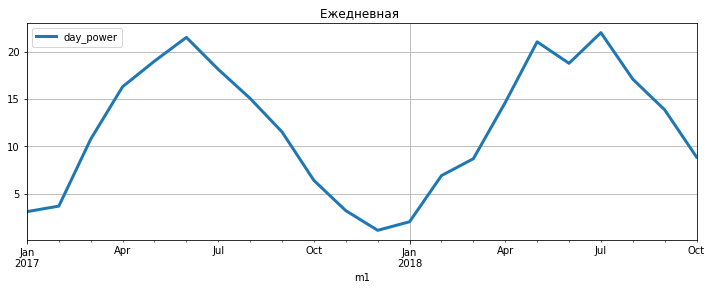

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
gr=solar_gr.drop(['cum_power'], axis=1)
gr.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная ',
    grid = True,
    lw=3
);
